# Presentation Plots

I started this for the Dask Summit Presentation, but should keep it going for other stuff aswell

## Illustrate detrending

In [41]:
%load_ext autoreload
%autoreload 2

import pathlib
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina'
xr.set_options(cmap_sequential='cividis', display_style='html', keep_attrs=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import pathlib

from cmip6_omz.utils import loading_wrapper


In [18]:
kwargs = dict(source_id=["CanESM5-CanOE"], variable_id=["so"], member_id=['r1i1p2f1'])
trendfolder = pathlib.Path('../../../aguadv_omz_busecke_2021/data/processed/linear_regression_time_zarr_multimember/')

ddict_raw = loading_wrapper(**kwargs, detrend=False, experiment_id=["historical"])
ddict_control = loading_wrapper(**kwargs, detrend=False, experiment_id=["piControl"])

ddict_detrended = loading_wrapper(
    **kwargs, detrend=True, experiment_id=["historical"], trendfolder=trendfolder
)


### Loading Raw Data ###
Dataframe size before picking latest version: 1
Getting latest version...

Dataframe size after picking latest version: 1

Done....


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.version.zstore'


### Loading Raw Data ###
Dataframe size before picking latest version: 1
Getting latest version...

Dataframe size after picking latest version: 1

Done....


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.version.zstore'


### Loading Raw Data ###
Dataframe size before picking latest version: 1
Getting latest version...

Dataframe size after picking latest version: 1

Done....


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.version.zstore'


### Detrending Data ###


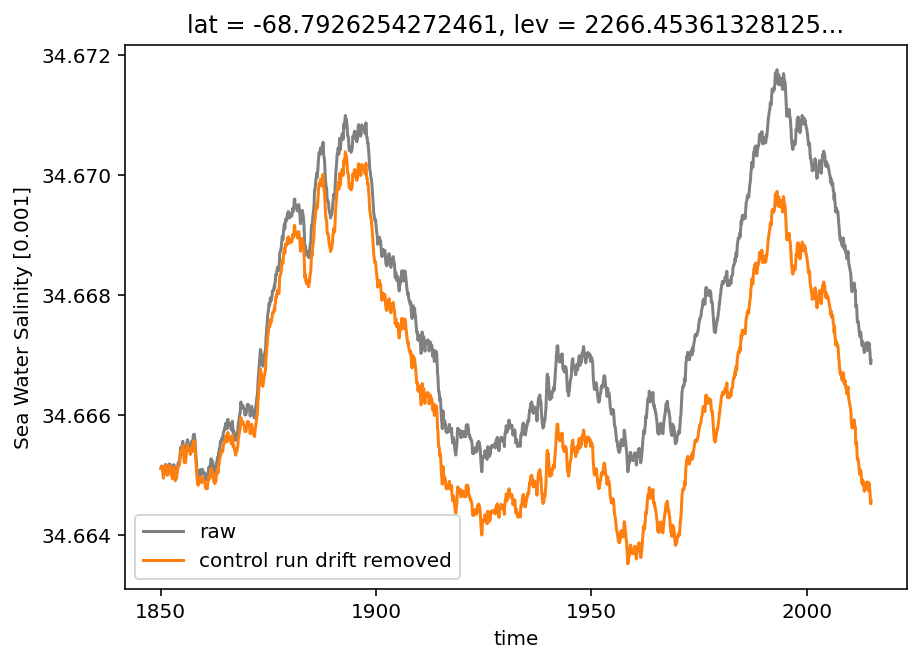

In [46]:
sample = {"x": 200, "y": 35, 'lev':30}
plt.figure(figsize=[7,5])
for ds, color, label in zip(
    [
        ddict_raw["CMIP.CCCma.CanESM5-CanOE.historical.r1i1p2f1.Omon.so.gn"],
        ddict_detrended["CMIP.CCCma.CanESM5-CanOE.historical.r1i1p2f1.Omon.so.gn"],
#         ddict_control["CMIP.CCCma.CanESM5-CanOE.piControl.r1i1p2f1.Omon.so.gn"],
    ],
    ["0.5", "C1", "C2"],
    ['raw', 'control run drift removed']
):
    ds.isel(**sample).so.plot(color=color, label=label)
plt.legend()

In [26]:
ds = (ddict_detrended["CMIP.CCCma.CanESM5-CanOE.historical.r1i1p2f1.Omon.so.gn"] - ddict_raw["CMIP.CCCma.CanESM5-CanOE.historical.r1i1p2f1.Omon.so.gn"])